In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [2]:
end = dt.datetime.now()
start_time = end - dt.timedelta(days=300)

Estudar a volatilidade dos preços das ações, usando ATR(alcance médio verdadeiro)



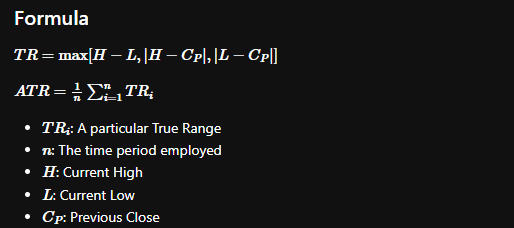

In [26]:
data = yf.download(tickers='NFLX', start=start_time, end=end)
sp500 = yf.download('SPY', start=start_time, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
def ATR(data):
  high_low = data["High"] - data['Low']
  high_cp = np.abs(data['High'] - data['Close'].shift())
  low_cp = np.abs(data['Low'] - data['Close'].shift())

  df = pd.concat([high_low, high_cp, low_cp], axis=1)

  true_range = np.max(df, axis=1)

  average_true_range = true_range.rolling(14).mean()

  return average_true_range


In [5]:
atr = ATR(data)


Text(0, 0.5, 'Price')

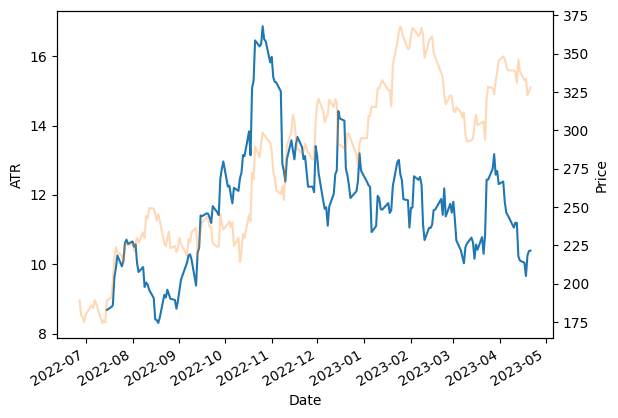

In [6]:
fig,ax = plt.subplots()
atr.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel('Price')

#plot da volatilidade e o preço da ação no dia

Calcular o Shape Ratio (avalia a rentabilidade de um investimento em relação ao risco da aplicação financeira)

Formula:

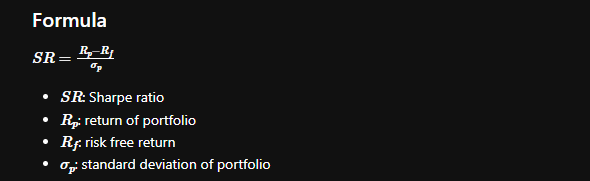

In [7]:
#portfolio escolhido
tickers=['NFLX', 'MSFT', 'IBM']
data = yf.download(tickers=tickers, start=start_time, end=end)
data = data['Adj Close']


[*********************100%***********************]  3 of 3 completed


In [8]:
portfolio = [.50, .30, .20]
portfolio = np.array(portfolio)

In [9]:
def sharpe_ratio_calc(portfolio, data):
  log_returns = np.log(data/data.shift())
  weight = portfolio
  weight /= weight.sum()
  exp_rtn = np.sum(log_returns.mean()*weight)*len(data)
  exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*len(data), weight)))
  sharpe_ratio = exp_rtn / exp_vol
  return sharpe_ratio, exp_rtn, exp_vol

sharpe_ratio = sharpe_ratio_calc(portfolio, data)[0]
sharpe_ratio

0.42100424933898567

Simulação de Monte Carlo

1) Calculando a melhor distribuição de ações no Portfolio utilizando sharpe ratio


In [ ]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies') ##pegando a lista de empresas na S&P para criar um portfolio
payload = payload[0]['Symbol']
payload

In [86]:
portfolio_size = 10

numbers = np.random.randint(502, size=portfolio_size)  # pegando 10 numeros aleatorios em 502 para pegar 10 tickers
tickers = payload[numbers].values
tickers = ','.join(tickers)

data = yf.download(tickers=tickers, start=start_time, end=end) # fazendo o download das informações


[*********************100%***********************]  10 of 10 completed


In [87]:
data = data['Adj Close']
data

,AEP,COST,FDS,HCA,JCI,MOH,OKE,PAYX,SHW,TRGP
Date,,,,,,,,,,
2022-06-27,92.505951,479.219086,388.770355,178.490082,47.765789,274.559998,54.164589,120.273399,225.440231,59.840092
2022-06-28,92.603340,466.148102,373.712524,174.519669,47.559601,272.230011,54.460888,117.547485,221.619370,61.554028
2022-06-29,92.885788,467.371643,380.769348,174.370758,47.795242,281.459991,53.648464,112.615356,223.703476,59.731735
2022-06-30,93.440941,476.762024,382.230408,166.817047,47.009785,279.609985,53.046318,111.654434,222.214828,58.776264
2022-07-01,95.398575,483.208008,391.801819,173.765274,47.598881,282.899994,54.241055,114.095978,233.449127,60.086346
...,...,...,...,...,...,...,...,...,...,...
2023-04-17,93.290001,493.940002,416.440002,271.100006,58.230000,295.130005,66.410004,109.570000,230.699997,76.500000
2023-04-18,92.470001,496.899994,416.959991,271.450012,58.189999,290.720001,66.739998,109.300003,230.070007,76.860001
2023-04-19,93.540001,496.029999,416.529999,272.989990,58.869999,277.470001,66.349998,109.769997,233.589996,76.230003


In [88]:
n = 5000
port_weights = np.zeros((n,portfolio_size))
exp_returns = np.zeros(n)
exp_volat = np.zeros(n)
sharpe_ratios=  np.zeros(n)

for i in range(n): ## calcula o sharpe_ratio para 5000 diferentes distribuições das ações
  weight = np.random.random(portfolio_size)
  weight /= weight.sum()
  port_weights[i] = weight
  sharpe_ratios[i], exp_returns[i], exp_volat[i] = sharpe_ratio_calc(port_weights[i], data)


In [89]:
sharpe_ratios.max()

1.1045064503504733

In [90]:
port_weights[sharpe_ratios.argmax()]

array([0.12897328, 0.0360626 , 0.08806605, 0.30072444, 0.08206284,
       0.06845297, 0.2155066 , 0.00791803, 0.03083094, 0.04140224])

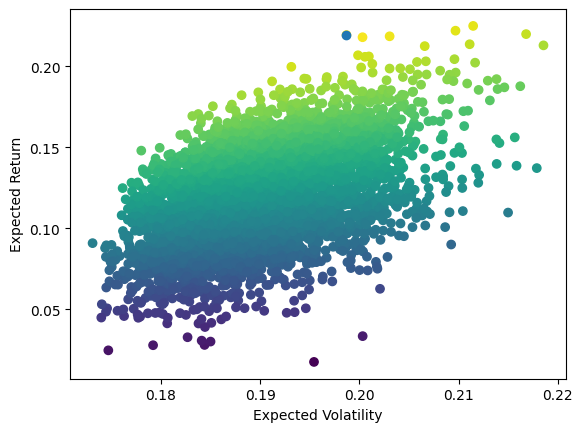

In [91]:
fig, ax = plt.subplots()
ax.scatter(exp_volat, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volat[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()])
ax.set_xlabel("Expected Volatility")
ax.set_ylabel('Expected Return')
plt.show()

Fazendo a simulação de Monte Carlo


In [97]:
def mean_returns(data, start, end):
  returns = data.pct_change()
  mean_returns = returns.mean()
  covMatrix = returns.cov()

  return mean_returns, covMatrix

mean_returns, covMatrix = mean_returns(data, start_time, end)

In [98]:

num_sim=200
TimeFrame = 100
meanM = np.full(shape=(TimeFrame, portfolio_size), fill_value=mean_returns)
meanM = meanM.T

portfolio_sim_matrix = np.full(shape=(TimeFrame, num_sim), fill_value=0.0)

In [99]:

initital_port =100000

for i in range(0,num_sim):
  z = np.random.normal(size=(TimeFrame, portfolio_size))
  l = np.linalg.cholesky(covMatrix)
  dailyReturns = meanM + np.inner(l, z)
  portfolio_sim_matrix[:, i] = np.cumprod(np.inner(port_weights[sharpe_ratio.argmax()], dailyReturns.T)+1)*initital_port

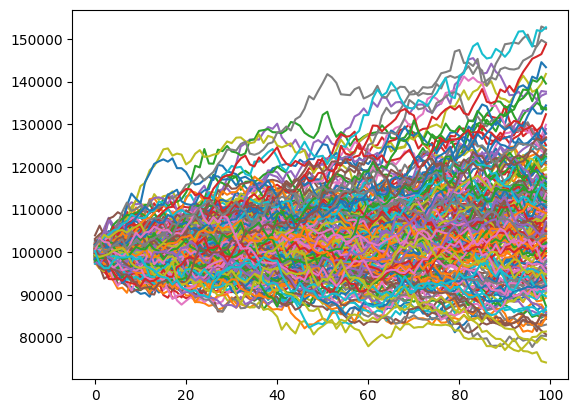

In [100]:
plt.plot(portfolio_sim_matrix)
plt.show()

Correlação entre ações(preços)


In [101]:
log_returns = np.log(data/data.shift())

In [102]:
corr = log_returns.corr()

In [103]:
corr.style.background_gradient(cmap='coolwarm')

,AEP,COST,FDS,HCA,JCI,MOH,OKE,PAYX,SHW,TRGP
AEP,1.000000,0.495364,0.438175,0.416737,0.408665,0.379569,0.391734,0.542490,0.454754,0.291219
COST,0.495364,1.000000,0.493694,0.394339,0.455902,0.301830,0.360605,0.585411,0.470318,0.288893
FDS,0.438175,0.493694,1.000000,0.411939,0.519678,0.343279,0.383368,0.545574,0.531618,0.310623
HCA,0.416737,0.394339,0.411939,1.000000,0.466999,0.261747,0.476733,0.503003,0.422818,0.396749
JCI,0.408665,0.455902,0.519678,0.466999,1.000000,0.201637,0.528747,0.560668,0.532206,0.482250
MOH,0.379569,0.301830,0.343279,0.261747,0.201637,1.000000,0.266871,0.270859,0.338401,0.260425
OKE,0.391734,0.360605,0.383368,0.476733,0.528747,0.266871,1.000000,0.496137,0.306377,0.876902
PAYX,0.542490,0.585411,0.545574,0.503003,0.560668,0.270859,0.496137,1.000000,0.527385,0.388065
SHW,0.454754,0.470318,0.531618,0.422818,0.532206,0.338401,0.306377,0.527385,1.000000,0.241646
TRGP,0.291219,0.288893,0.310623,0.396749,0.482250,0.260425,0.876902,0.388065,0.241646,1.000000


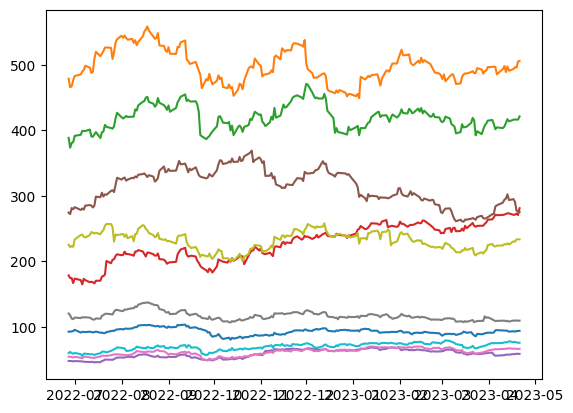

In [104]:
plt.plot(data)
plt.show()

Utilizando o S&P500 como benchmark

In [105]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())
log_returns

,AEP,COST,FDS,HCA,JCI,MOH,OKE,PAYX,SHW,TRGP,SP500
Date,,,,,,,,,,,
2022-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-28,0.001052,-0.027654,-0.039502,-0.022496,-0.004326,-0.008522,0.005455,-0.022925,-0.017094,0.028239,-0.020645
2022-06-29,0.003045,0.002621,0.018707,-0.000854,0.004942,0.033343,-0.015030,-0.042864,0.009360,-0.030052,-0.000815
2022-06-30,0.005959,0.019893,0.003830,-0.044286,-0.016570,-0.006595,-0.011287,-0.008569,-0.006677,-0.016125,-0.008157
2022-07-01,0.020734,0.013430,0.024733,0.040808,0.012453,0.011698,0.022273,0.021631,0.049320,0.022045,0.010521
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,0.008504,0.005359,0.005949,-0.008265,0.012790,0.004857,-0.009293,0.015173,0.022133,-0.018264,0.003582
2023-04-18,-0.008829,0.005975,0.001248,0.001290,-0.000687,-0.015055,0.004957,-0.002467,-0.002735,0.004695,0.000652
2023-04-19,0.011505,-0.001752,-0.001032,0.005657,0.011618,-0.046648,-0.005861,0.004291,0.015184,-0.008230,-0.000169


In [106]:
corr = log_returns.corr()
corr.style.background_gradient(cmap='coolwarm')

,AEP,COST,FDS,HCA,JCI,MOH,OKE,PAYX,SHW,TRGP,SP500
AEP,1.000000,0.495364,0.438175,0.416737,0.408665,0.379569,0.391734,0.542490,0.454754,0.291219,0.563936
COST,0.495364,1.000000,0.493694,0.394339,0.455902,0.301830,0.360605,0.585411,0.470318,0.288893,0.697057
FDS,0.438175,0.493694,1.000000,0.411939,0.519678,0.343279,0.383368,0.545574,0.531618,0.310623,0.634276
HCA,0.416737,0.394339,0.411939,1.000000,0.466999,0.261747,0.476733,0.503003,0.422818,0.396749,0.583214
JCI,0.408665,0.455902,0.519678,0.466999,1.000000,0.201637,0.528747,0.560668,0.532206,0.482250,0.709860
MOH,0.379569,0.301830,0.343279,0.261747,0.201637,1.000000,0.266871,0.270859,0.338401,0.260425,0.351310
OKE,0.391734,0.360605,0.383368,0.476733,0.528747,0.266871,1.000000,0.496137,0.306377,0.876902,0.666012
PAYX,0.542490,0.585411,0.545574,0.503003,0.560668,0.270859,0.496137,1.000000,0.527385,0.388065,0.790574
SHW,0.454754,0.470318,0.531618,0.422818,0.532206,0.338401,0.306377,0.527385,1.000000,0.241646,0.604080
TRGP,0.291219,0.288893,0.310623,0.396749,0.482250,0.260425,0.876902,0.388065,0.241646,1.000000,0.566203


Achar uma ação com correlação negativa com a S&P

In [107]:
def test_corr(ticker):
  df = yf.download(tickers=ticker, start=start_time, end=end)
  lr = log_returns.copy()
  lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
  return lr.corr()

In [108]:
test_corr('TLT')

[*********************100%***********************]  1 of 1 completed


,AEP,COST,FDS,HCA,JCI,MOH,OKE,PAYX,SHW,TRGP,SP500,TLT
AEP,1.000000,0.495364,0.438175,0.416737,0.408665,0.379569,0.391734,0.542490,0.454754,0.291219,0.563936,0.213841
COST,0.495364,1.000000,0.493694,0.394339,0.455902,0.301830,0.360605,0.585411,0.470318,0.288893,0.697057,0.045770
FDS,0.438175,0.493694,1.000000,0.411939,0.519678,0.343279,0.383368,0.545574,0.531618,0.310623,0.634276,0.220546
HCA,0.416737,0.394339,0.411939,1.000000,0.466999,0.261747,0.476733,0.503003,0.422818,0.396749,0.583214,0.223285
JCI,0.408665,0.455902,0.519678,0.466999,1.000000,0.201637,0.528747,0.560668,0.532206,0.482250,0.709860,0.113013
MOH,0.379569,0.301830,0.343279,0.261747,0.201637,1.000000,0.266871,0.270859,0.338401,0.260425,0.351310,0.066531
OKE,0.391734,0.360605,0.383368,0.476733,0.528747,0.266871,1.000000,0.496137,0.306377,0.876902,0.666012,0.028262
PAYX,0.542490,0.585411,0.545574,0.503003,0.560668,0.270859,0.496137,1.000000,0.527385,0.388065,0.790574,0.072187
SHW,0.454754,0.470318,0.531618,0.422818,0.532206,0.338401,0.306377,0.527385,1.000000,0.241646,0.604080,0.296145
TRGP,0.291219,0.288893,0.310623,0.396749,0.482250,0.260425,0.876902,0.388065,0.241646,1.000000,0.566203,-0.002488
